In [1]:
import sys
from equadratures import polytree
import random
import numpy as np
import scipy.stats as st
import time
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.lines as mlines
%matplotlib inline
from copy import deepcopy

In [80]:
def f(x, noise):
    if noise:
        noise = 0.25 * st.norm.rvs(0, 1)
    else:
        noise = 0
    if x <= 0.4:
        return 0.963 + 0.851*x + noise
    elif x > 0.4:
        return 1.909 - 0.868*x + noise
    
def sample():
    X, y = [], []
    for i in range(20):
        x = -1 + random.random() * 3   
        X.append(np.array([x]))
        y.append(np.array([f(x, True)]))
    return np.array(X), np.array(y)

X, y = sample()
y = np.reshape(y, (y.shape[0], 1))

In [81]:
tree = polytree.PolyTree(min_samples_leaf=5, order=1, logging=True)
tree.fit(X, y)

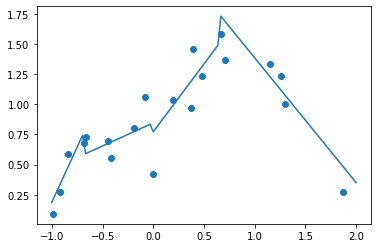

In [82]:
X_test = np.linspace(-1, 2, num=100)
X_test = np.reshape(X_test, (X_test.shape[0], 1))
y_test = tree.predict(X_test)
plt.plot(X_test, y_test)
plt.scatter(X,y)
plt.show()

In [7]:
np.linspace(0, 1, num=100).shape

(100,)